# Kaggle NYC AirBnB Open Data

In [2]:
df <- read_csv("AB_NYC_2019.csv")

Parsed with column specification:
cols(
  id = col_double(),
  name = col_character(),
  host_id = col_double(),
  host_name = col_character(),
  neighbourhood_group = col_character(),
  neighbourhood = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  room_type = col_character(),
  price = col_double(),
  minimum_nights = col_double(),
  number_of_reviews = col_double(),
  last_review = col_date(format = ""),
  reviews_per_month = col_double(),
  calculated_host_listings_count = col_double(),
  availability_365 = col_double()
)


In [3]:
head(df)

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,NA,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
theme_set(theme_minimal())

# Data Frames

In [5]:
df_man <- df %>% filter(neighbourhood_group == "Manhattan")
df_brook <- df %>% filter(neighbourhood_group == "Brooklyn")
df_bronx <- df %>% filter(neighbourhood_group == "Bronx")
df_queens <- df %>% filter(neighbourhood_group == "Queens")
df_state_island <- df %>% filter(neighbourhood_group == "Staten Island")

# Plots

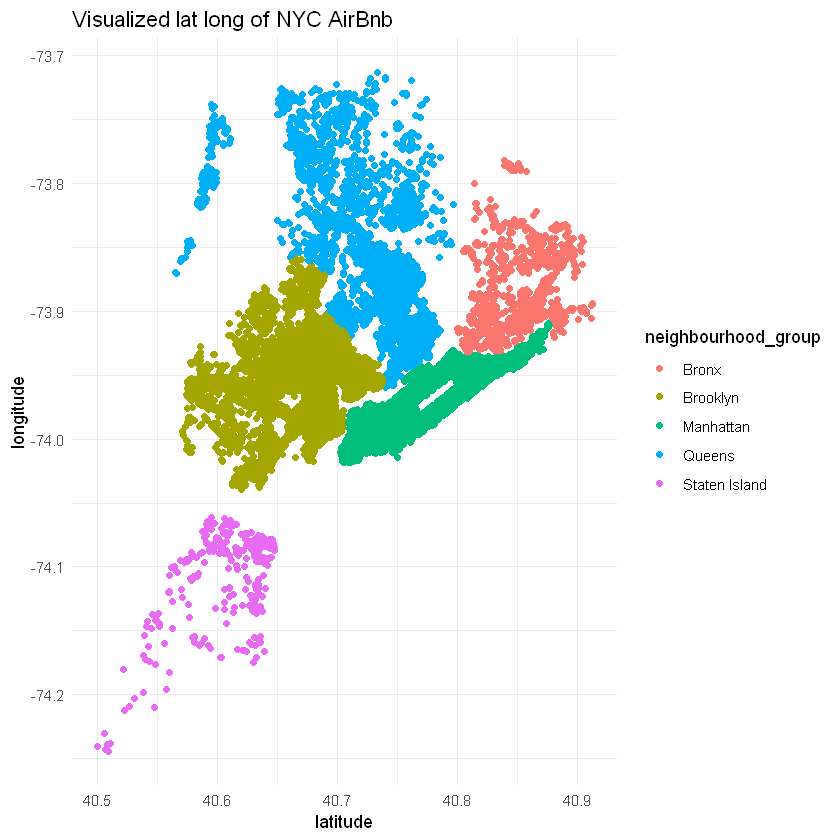

In [6]:
nyc_plot<- ggplot(df, aes(x= latitude, y = longitude ,
              colour = neighbourhood_group)) + 
  geom_point() + ggtitle("Visualized lat long of NYC AirBnb")
nyc_plot

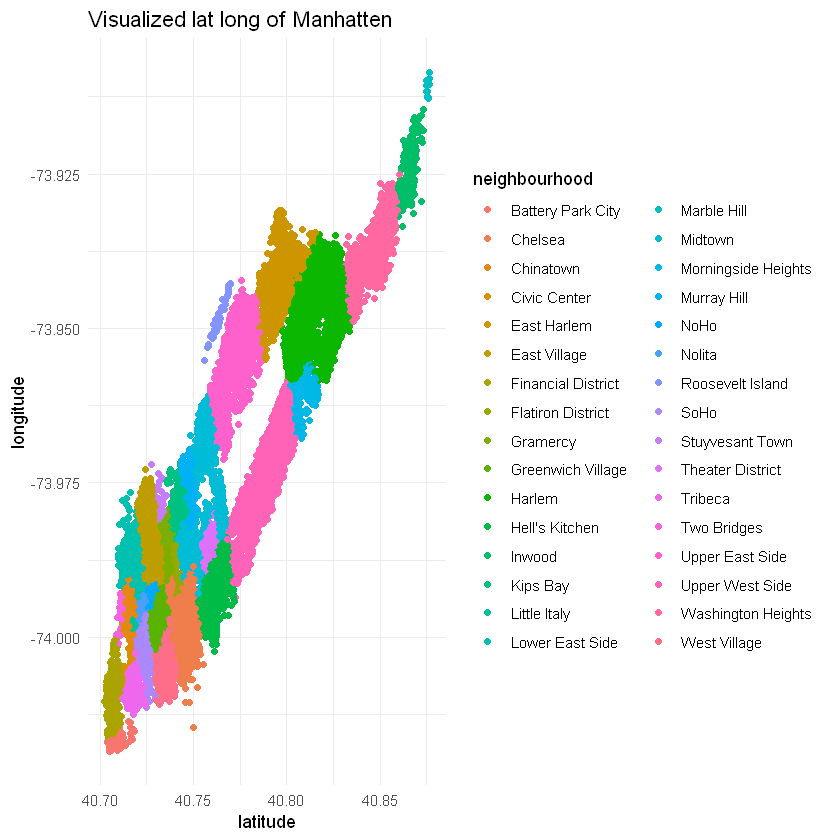

In [8]:
manh_plot <- ggplot(df_man, aes(x=latitude, y = longitude, 
                                colour = neighbourhood)) +
  geom_point() + ggtitle("Visualized lat long of Manhatten")

manh_plot

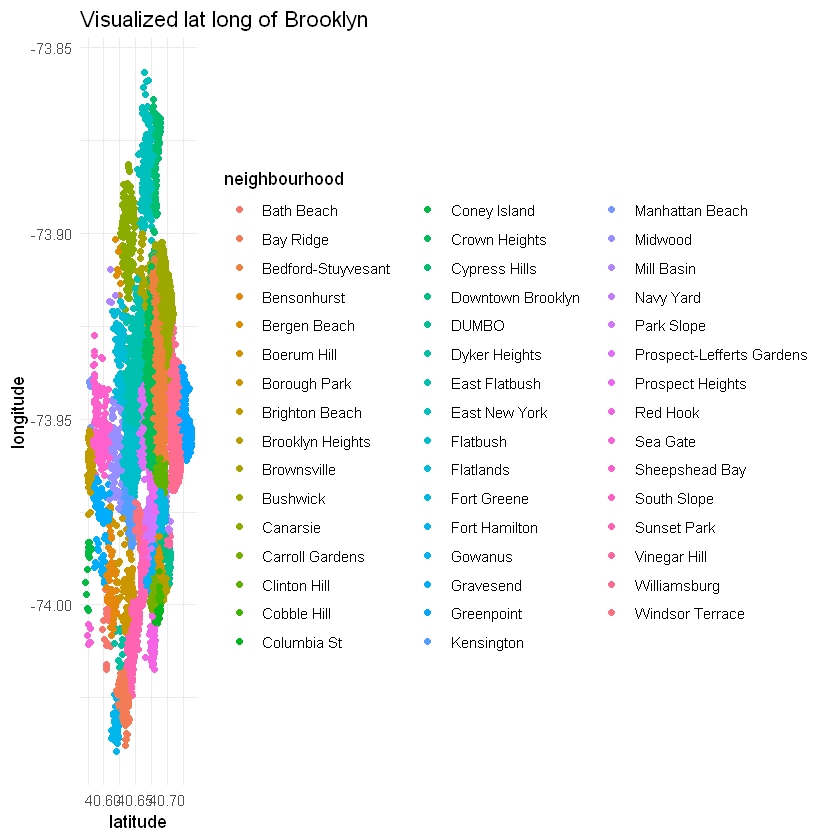

In [9]:
brook_plot <- ggplot(df_brook, aes(x=latitude, y=longitude,
                                   colour=neighbourhood))+
  geom_point() + ggtitle("Visualized lat long of Brooklyn")
brook_plot

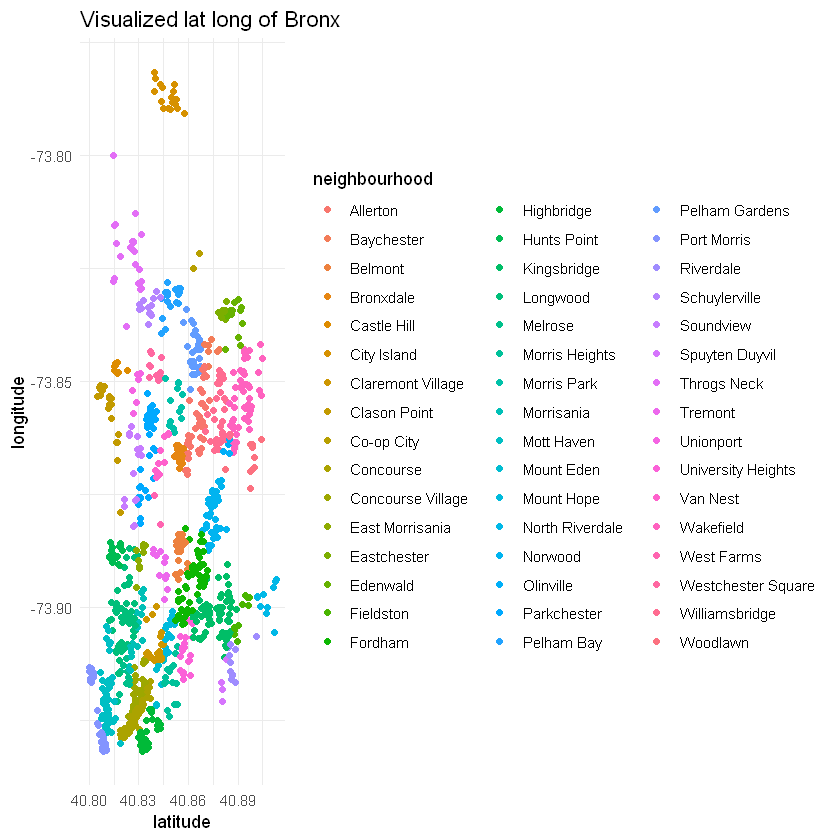

In [10]:
bronx_plot <- ggplot(df_bronx, aes(x=latitude, y=longitude,
                                   colour = neighbourhood)) +
  geom_point() + ggtitle("Visualized lat long of Bronx")
bronx_plot 

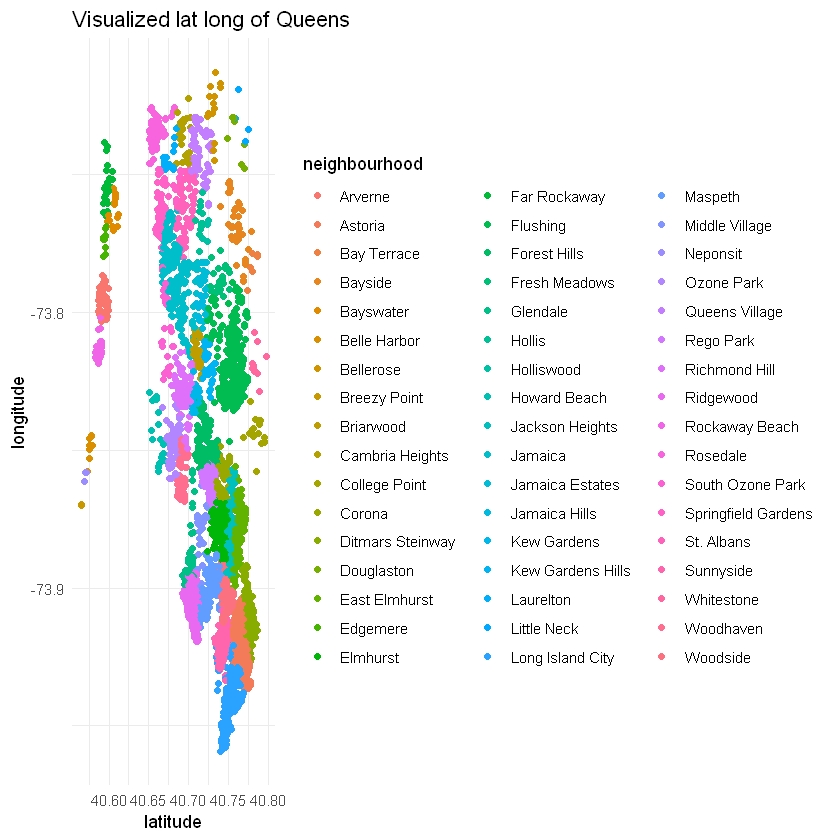

In [11]:
queens_plot <- ggplot(df_queens, aes(x=latitude, y=longitude,
                                     colour=neighbourhood)) + 
  geom_point() + ggtitle("Visualized lat long of Queens")
queens_plot

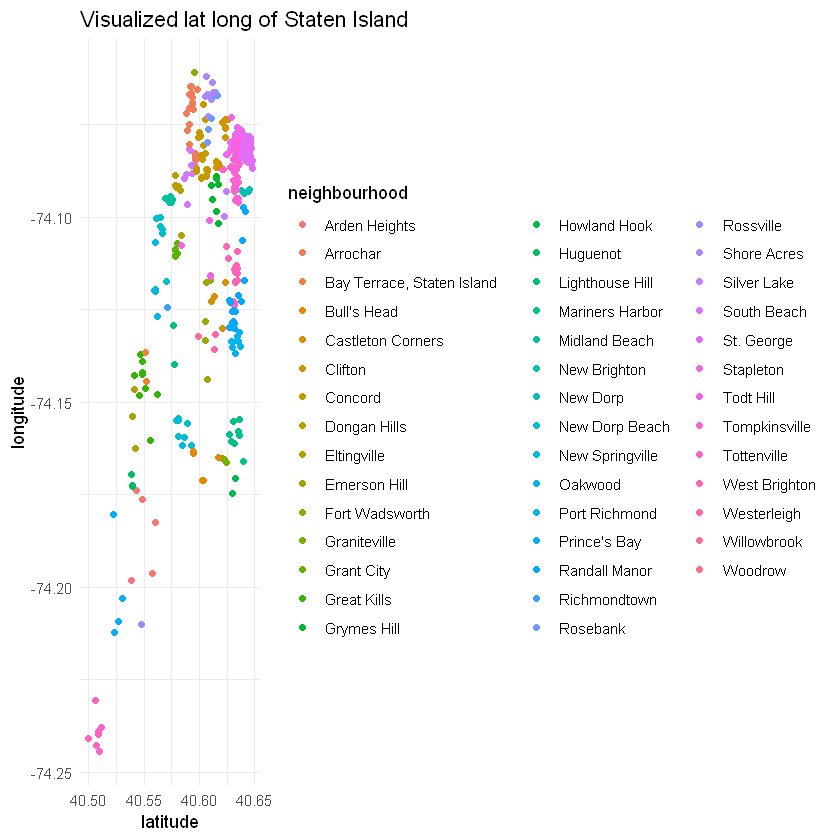

In [12]:
staten_plot <- ggplot(df_state_island,
                      aes(x=latitude,  
                          y=longitude,  colour=neighbourhood)) +
  geom_point() + ggtitle("Visualized lat long of Staten Island")
staten_plot

# ----- Compare the number of reviews vs price -----
In the hope to see if more expensive AirBnB would have more reviews. 

In [13]:
nyc_price_200 <- df %>% filter(price < 200 ) %>% filter(number_of_reviews >0)
# limiting to 200 dollars a night though this is not counting min nights to stay
# making sure there is at least one review

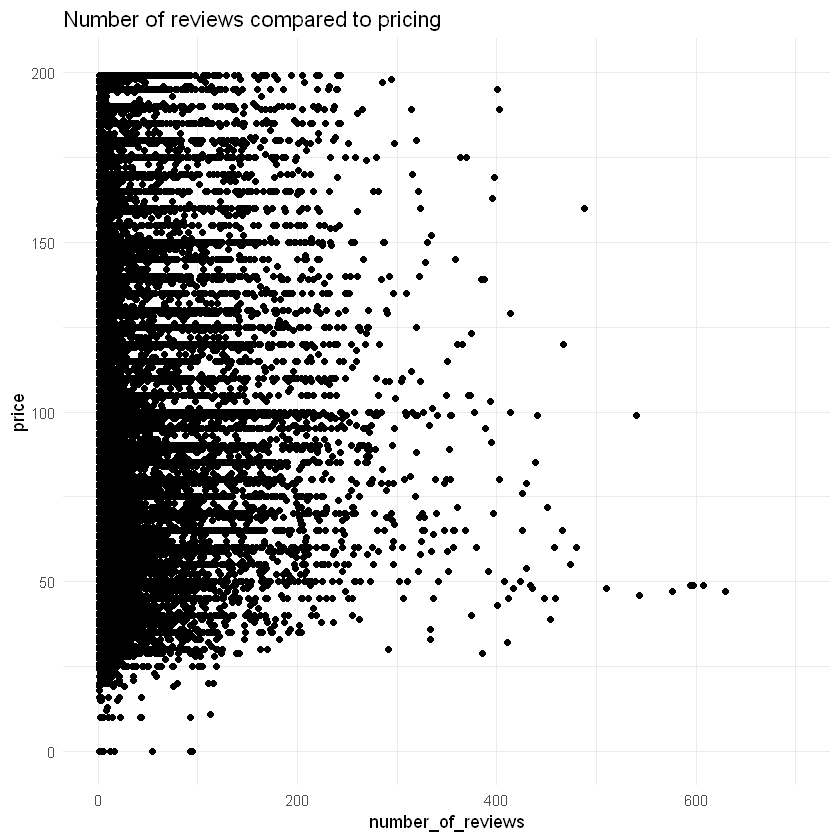

In [14]:
nyc_price_plot <- ggplot(nyc_price_200, aes(x=number_of_reviews, y= price))+
  geom_point() + coord_cartesian(xlim = c(0,700),
                                                ylim= c(0,200)) +
   ggtitle("Number of reviews compared to pricing")
nyc_price_plot

# From this plot we can see that places around 50 dollars a night get more reviews
# But there are at least 200 - 400 reviews for anything over 50 dollars

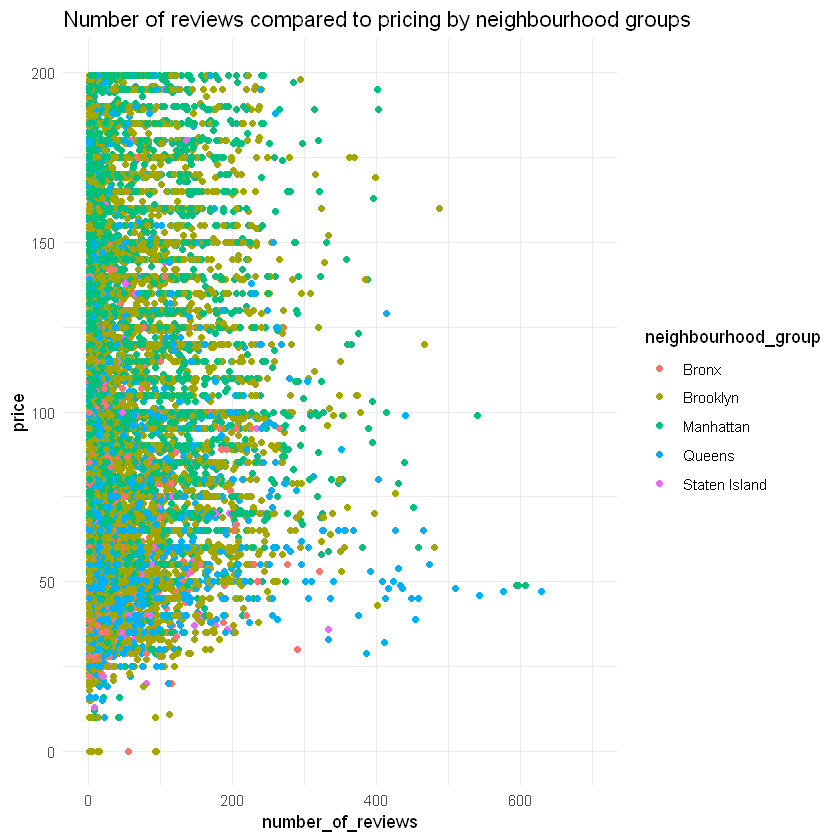

In [15]:
nyc_price_plot_co <- ggplot(nyc_price_200, aes(x=number_of_reviews, y= price, colour=neighbourhood_group))+
  geom_point() + coord_cartesian(xlim = c(0,700),
                                 ylim= c(0,200)) + ggtitle("Number of reviews compared to pricing by neighbourhood groups")
nyc_price_plot_co

In [16]:
# Now we can see what grouping they belong to
# We can see more reviews are from Queens and around 3 from Manhattan have 600 ish reviews
# Moving on let's see the average price of the properties 


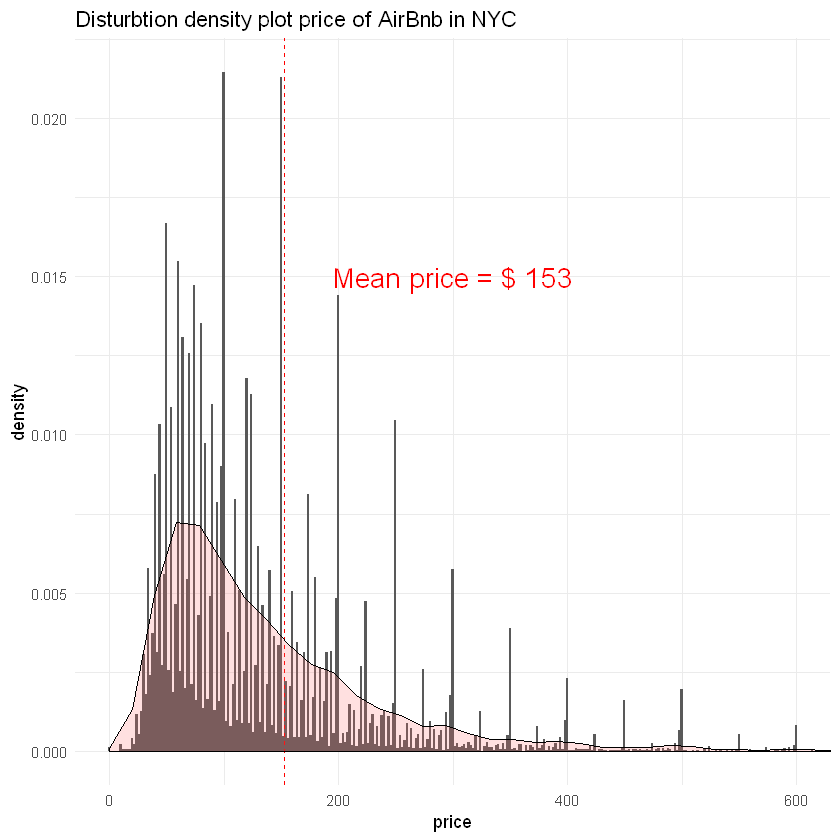

In [17]:
nyc_avg_price <- ggplot(df, aes(x=price)) + coord_cartesian(xlim = c(0,600))+
  geom_histogram(binwidth = 2, aes(y=..density..)) + geom_vline(aes(xintercept = mean(price, na.rm = T)), color="red", linetype="dashed")+
  geom_density(alpha = .2, fill = "#FF6666") + ggtitle("Disturbtion density plot price of AirBnb in NYC") +
  annotate("text", x=300,y=0.015, 
           label = paste("Mean price = $", 
                         (paste0(round(mean(df$price))))), color = "red", size=6)
nyc_avg_price

# Density plot showing visual representation of the distirubtion of price within the AirBnb dataset
# --------- Visualise the top 5 neighbourhoods of NYC ---------


In [18]:
# Counts the Neighbourhood_group column, sorts it from highest to lowest then slices max to min to select by position
nyc_count <- df %>% count(neighbourhood_group, sort = TRUE) %>% slice(which.max(n):which.min(n))
nyc_count

neighbourhood_group,n
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


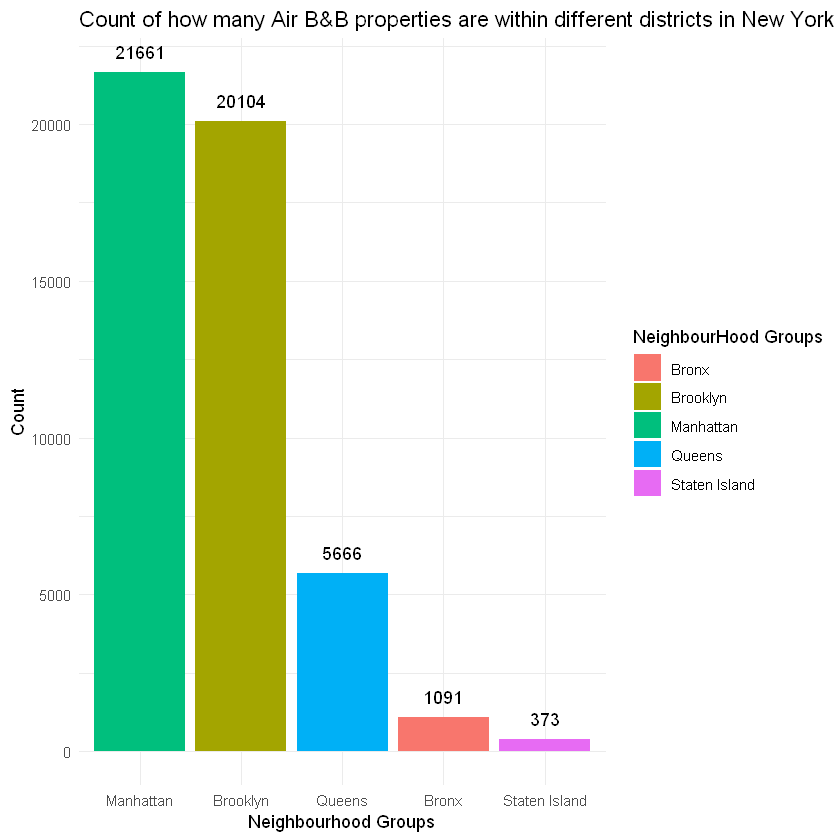

In [19]:
ggplot(nyc_count, aes(x= reorder(neighbourhood_group, -n), y= n, fill = neighbourhood_group)) + geom_col(position="dodge") +
  geom_text(aes(label = n), position= position_dodge(0.5), vjust=-1) + xlab("Neighbourhood Groups") + ylab("Count")+
  labs(fill = "NeighbourHood Groups", title="Count of how many Air B&B properties are within different districts in New York City")

# Counts by the neighbourhood but also showing the groups e.g. Brooklyn / Manhattan, then pipe into the head function for only top 5


In [20]:
nyc_top_5 <- df %>% count(neighbourhood_group,neighbourhood, sort = TRUE) %>% head()
nyc_top_5

neighbourhood_group,neighbourhood,n
Brooklyn,Williamsburg,3920
Brooklyn,Bedford-Stuyvesant,3714
Manhattan,Harlem,2658
Brooklyn,Bushwick,2465
Manhattan,Upper West Side,1971
Manhattan,Hell's Kitchen,1958


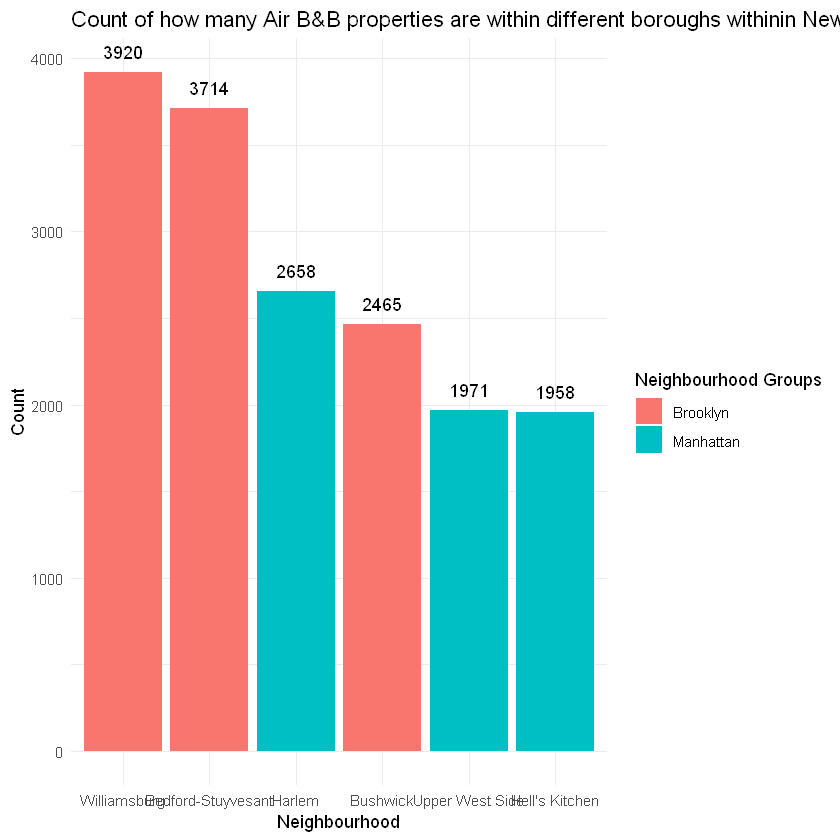

In [21]:
ggplot(nyc_top_5, aes(x= reorder(neighbourhood, -n), y= n, fill = neighbourhood_group)) + geom_col(position="dodge") +
  geom_text(aes(label = n), position= position_dodge(0.5), vjust=-1) + xlab("Neighbourhood") + ylab("Count") + 
  labs(fill = "Neighbourhood Groups", title="Count of how many Air B&B properties are within different boroughs withinin New York City's Districts")

# Counts by the neighbourhood but also showing the groups e.g. Brooklyn / Manhattan, then pipe into the head function for only bottom 5


In [23]:
nyc_bottom_5 <- df %>% count(neighbourhood_group,neighbourhood, sort = TRUE) %>% tail()
nyc_bottom_5

neighbourhood_group,neighbourhood,n
Staten Island,Fort Wadsworth,1
Staten Island,New Dorp,1
Staten Island,Richmondtown,1
Staten Island,Rossville,1
Staten Island,Willowbrook,1
Staten Island,Woodrow,1
